In [702]:
#1 Importing Panda and Numpy libraries for manipulation of data
import numpy as np
import pandas as pd
%matplotlib inline


In [704]:
#2 Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [708]:
import warnings
warnings.filterwarnings('ignore')

In [710]:
#3 Loading data
data = pd.read_csv('austo_automobile+%282%29+%281%29.csv')

In [712]:
#4 Displaying first 5 rows of dataset

data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [718]:
#5 Understanding the shape of the dataset

data.shape

(1581, 14)

There are 1581 rows and 14 columns in the data set

In [720]:
#6 Checking data type and missing values in data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


1. Age ,Salary,Partner_salary,Total_salary,Price,No_of_Dependents columns are are numerical columns,while the rest are categorical in nature
2. There are 6 numerical columns and 8 categoricl columns in the data set 
3. Except 'Gender',"Partner_salary',there 1581 observations in each column.
4. 'Gender' and 'Partner_salary" columns having 1528 and 1475 observations respectively ,which indicates missing data and it needs to be analysed
   
   

In [722]:
#7 Checking missing values in dataset
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

1.'Gender' and 'Partner_salary" columns having 1528 and 1475 observations respectively.
2.All other columns 1581 observation where as above 2 columns are having some missing data which needs to be analysed and addressed

In [724]:
#8 Checking for duplicates

data.duplicated().sum()

0

There are no duplictes in the data set

In [726]:
#9  checking the statistical summary of the data.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


1.Age : The average age of customer buying car is 31 .Minimum and maximum age of customer is 25 and 54 respectively.25% of customers are 25 years  old ,50% customers are 29 years old and 75% customers are 38 years old

2.No_od_Dependents : On average customers are having 2 dependents .Minimum and maximum dependents are 0 and 4 respectively

3.Salary : Salary of customers ranges between 30000 to 99000.On average customers are having salary 60000

4.Partnet_salary : Minimum partner salary is 0 and maximum is 80500 . 50% of people are having thier partner salary is 38300

5.price : Highest price of car is 70000 and minim is 35597

 

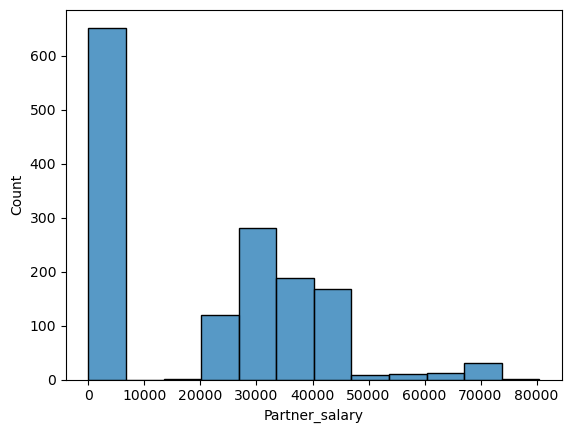

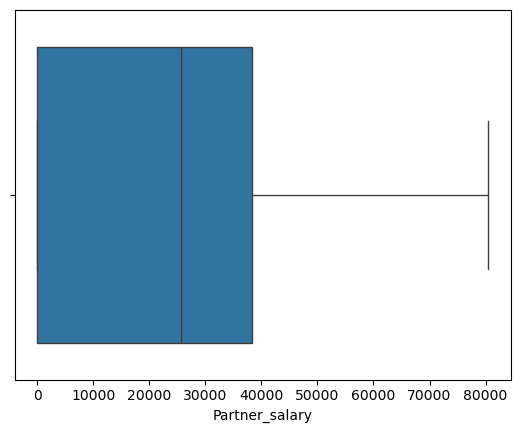

In [732]:
#10Univariate Analysis of the column which are having null values before data cleaning
#Partner_salary columns having 106 null values
sns.histplot(data=data,x='Partner_salary')
plt.show()
sns.boxplot(data=data,x='Partner_salary')
plt.show()


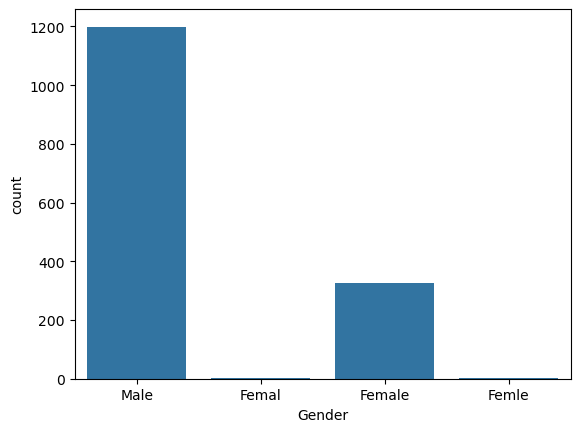

In [734]:
#11 Gender having 53 null values
sns.countplot(data=data, x='Gender');

In [736]:
#12 Finding unique values in gender column
data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [738]:
# 13 There are wrong entries like femal and female
data['Gender'].value_counts()  # There are wrong entries like femal and female

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [740]:
#14 Replacing with correct value
data['Gender']=data['Gender'].replace({'Femal':'Female' ,'Femle':'Female'})

In [742]:
#15 wong entries are corrected
print(data['Gender'].value_counts())
print(data['Gender'].unique())

Gender
Male      1199
Female     329
Name: count, dtype: int64
['Male' 'Female' nan]


In [744]:
#16 Replacing NaN value with Unknown
data['Gender']=data['Gender'].fillna('Unknown')

In [746]:
print(data['Gender'].value_counts())
print(data['Gender'].unique())

Gender
Male       1199
Female      329
Unknown      53
Name: count, dtype: int64
['Male' 'Female' 'Unknown']


In [748]:
#17 Checking null values in the Gender column after data cleaning and it is 0 now
data.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [750]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [752]:
#18 Checking NaN value count for the column partner_salary
data.loc[data['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [754]:
#19 Calculating mean of Partnet salary column
mean_v=data['Partner_salary'].mean()
mean_v

20225.5593220339

In [758]:
#20 Replacing NaN values with the mean using fillna() function
data.fillna({'Partner_salary':mean_v},inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [760]:
#21 Checking the data after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


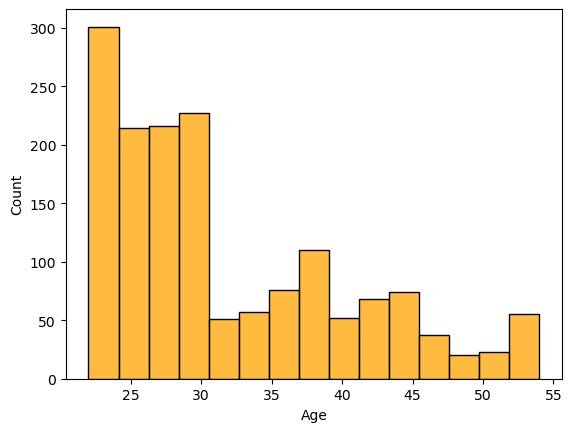

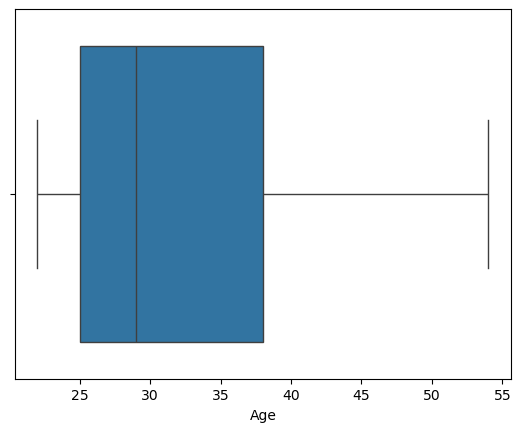

In [762]:
#22 Univariate Analysis - Age
sns.histplot(data=data,x='Age',color='orange')
plt.show()
sns.boxplot(data=data,x='Age')
plt.show()


Observation on Age

1.Car sale is more for the customers aho are aged between 20 to 30
2.Car sale is discreasing as the customer age is increasing
3.There are no outliers

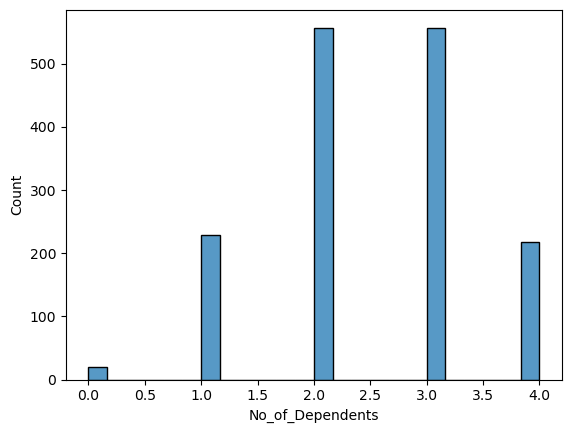

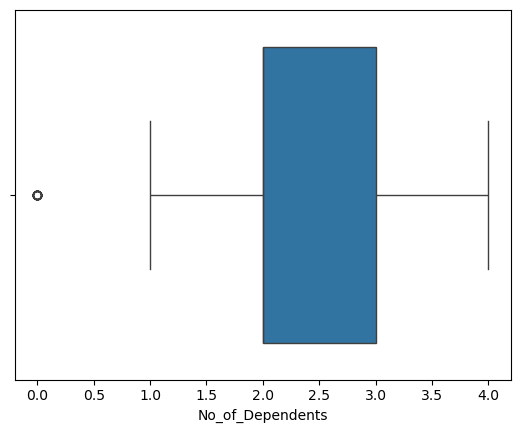

In [764]:
#23 Univariate Analysis -No_of_Dependents
sns.histplot(data=data,x='No_of_Dependents')
plt.show()
sns.boxplot(data=data,x='No_of_Dependents')
plt.show()

1.There are outliers present in the data
2.There are more than 500 customers who are having 2 to 3 dependents on them
3.This may affect the sales ,need further analyzation

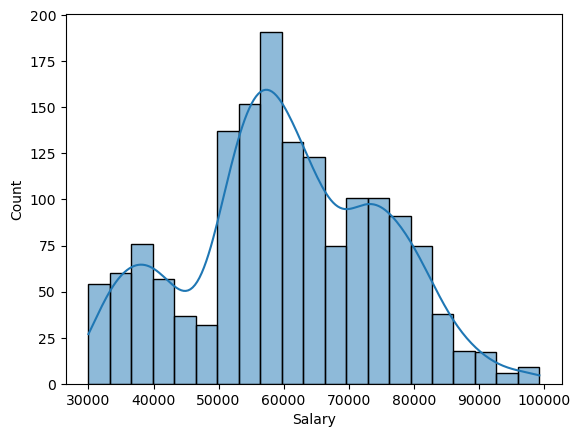

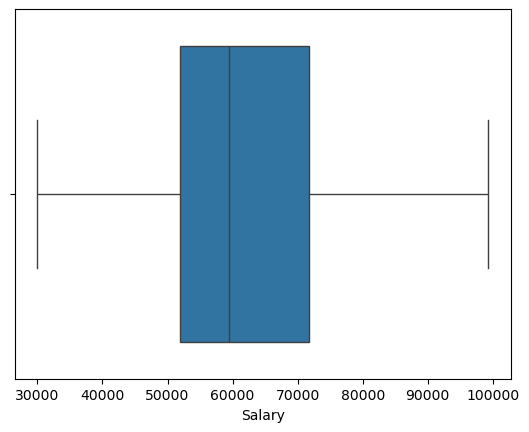

In [766]:
#24 Univariate Analysis- Salary
sns.histplot(data=data,x='Salary',kde=True)
plt.show()
sns.boxplot(data=data,x='Salary')
plt.show()

1.There are no outliers in the data
2.car sale is less for the customers whose salary range is between 30000 to 45000
3. car sale is more for the customers whose salary  ranges between 50000 to 80000
4.sale is again decreased for the customers whose salary is above 90000.
5.sale is for only SUV for the customers whose salary is above 90000.

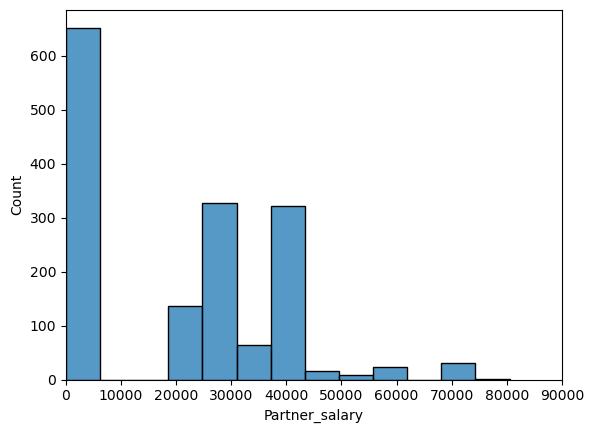

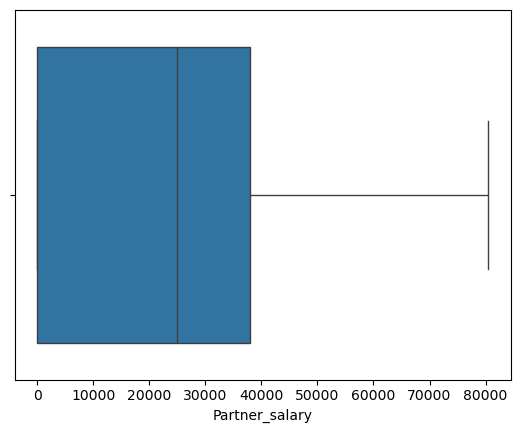

In [768]:
#25 Univariate Analysis-Partner_salary
sns.histplot(data=data,x='Partner_salary')
plt.xlim(0,90000)
plt.show()
sns.boxplot(data=data,x='Partner_salary')
plt.show()

1.There are no outliers
2.As partner salary is increasing car sale is dicreasing 

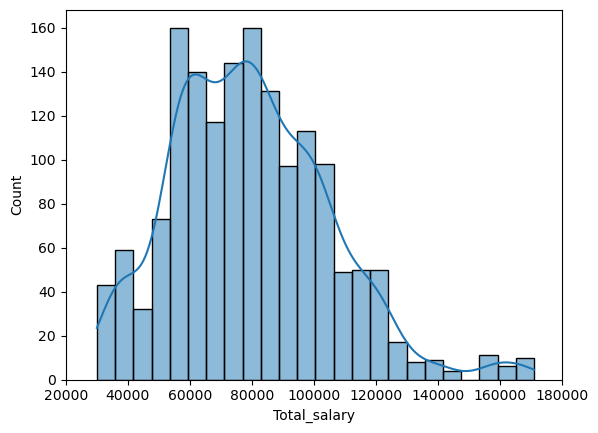

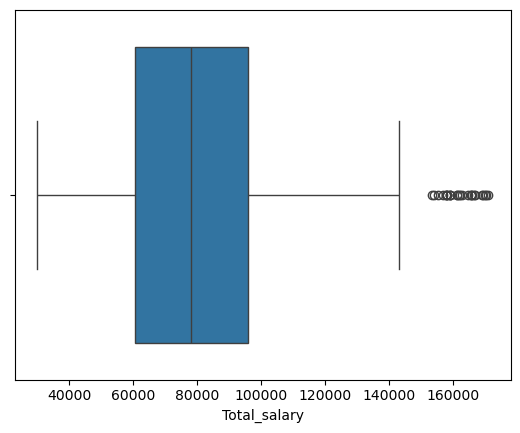

In [770]:
#26 Univariate Analysis - Total salary
sns.histplot(data=data,x='Total_salary',kde=True)
plt.xlim(20000,180000)
plt.show()
sns.boxplot(data=data,x='Total_salary')
plt.show()

1.There are outliers present in the data which genuine and no need of any imputation
2.Multiple modes in the data
3.sale is dicreasing as total salary of customer is increasing

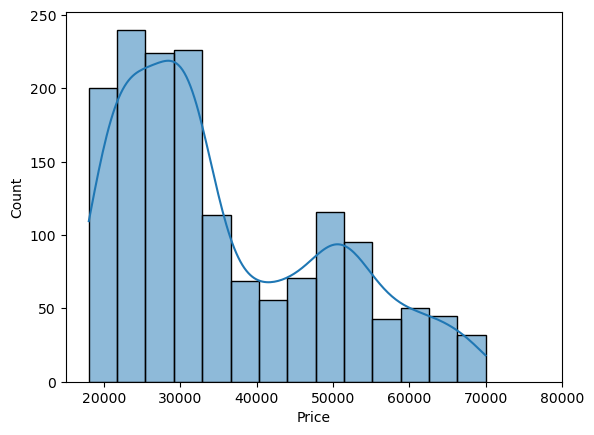

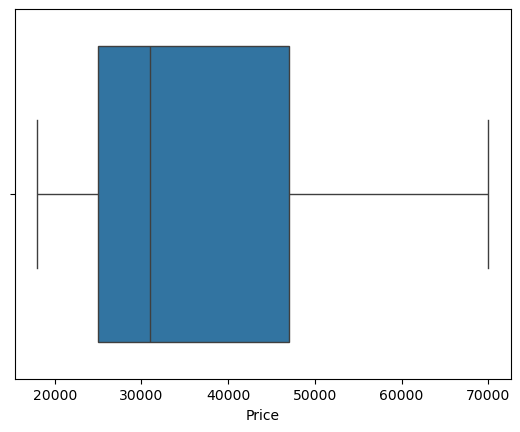

In [481]:
#27 Univariate Analysis - Price
sns.histplot(data=data,x='Price',kde=True)
plt.xlim(15000,80000)
plt.show()
sns.boxplot(data=data,x='Price')
plt.show()

1.There are no outliers present
2. sale is dicreasing the more car price and vice versa

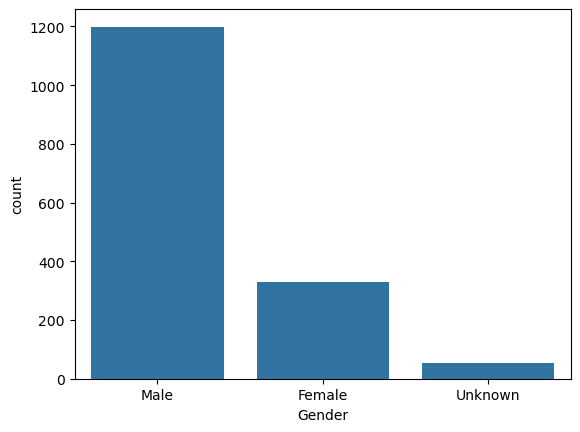

In [246]:
#28 Univariate categorical data Analysation - Gender
sns.countplot(data=data, x='Gender');


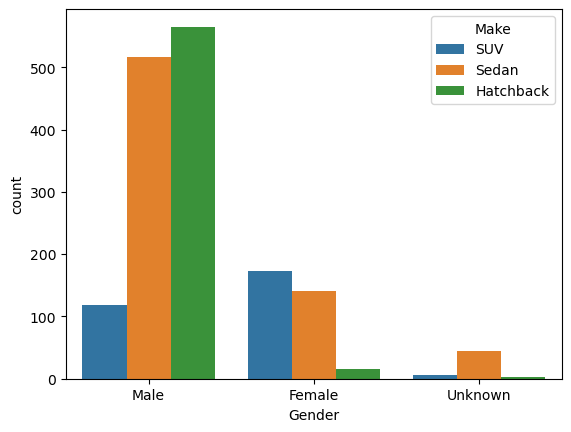

In [276]:
sns.countplot(data=data, x='Gender',hue='Make');

1.Sale is more for men than women
2.Women prefer SUVs more than men
3.Men prefers more sedan and hatch back than women
4.Very  less women prefers hatchbacks




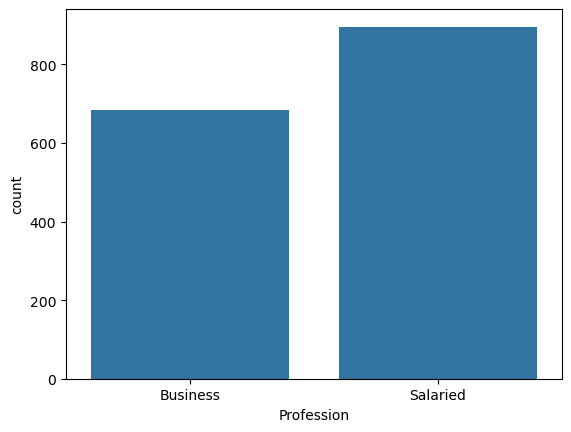

In [250]:
#29 Univariate categorical data Analysation - Profession
sns.countplot(data=data, x='Profession');

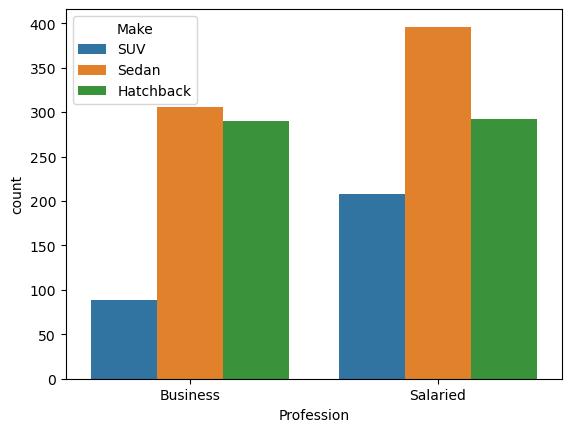

In [252]:
sns.countplot(data=data, x='Profession',hue='Make');

1.Sale is more with the customers who are salaried
2.Salaried persons prefer sedan more than any other model
3.Hatchback is the second prefered model for both salaried and business people
4.SUV is last preferd by business people

In [ ]:
#30 Univariate categorical data Analysation - Marital_status
sns.countplot(data=data, x='Marital_status');

1.Married persons prefer to buy car more than a person who is single

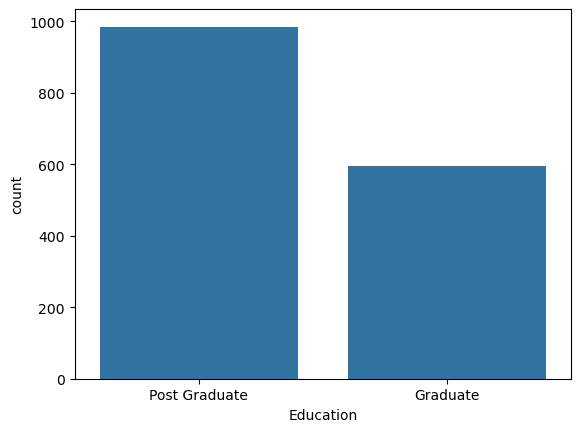

In [278]:
#31 Univariate categorical data Analysation - Education
sns.countplot(data=data, x='Education');

1.sale is more for Postgraduates than graduates

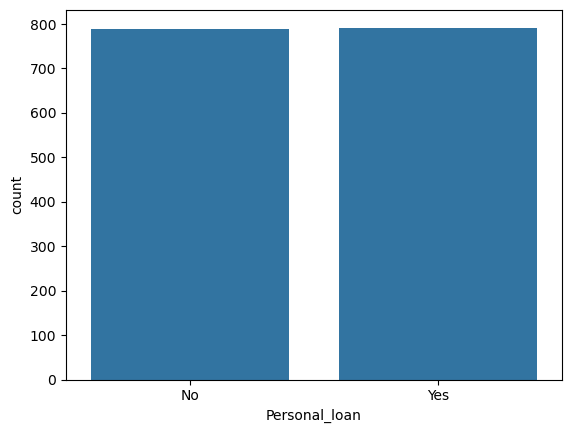

In [292]:
#32 Univariate categorical data Analysation - Personal_loan
sns.countplot(data=data, x='Personal_loan');

Sale is alomost same for the persons who takes personal loan and who does not take personal loan

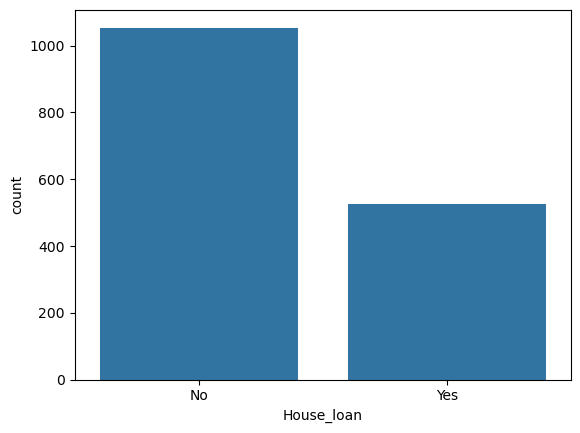

In [772]:
#33 Univariate categorical data Analysation - House_loan
sns.countplot(data=data, x='House_loan');

percentage of sale is less for thecustomers having house loan and more for persons does not having house loan

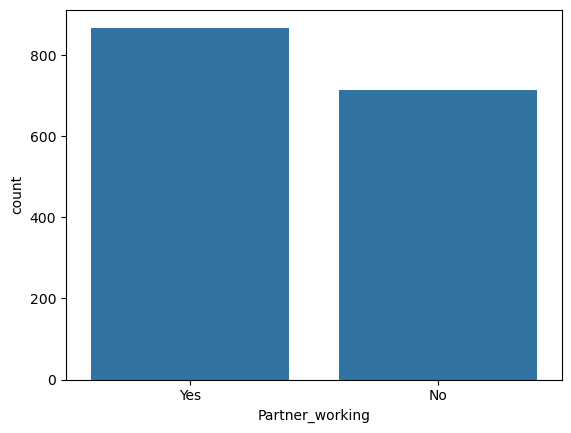

In [299]:
#34 Univariate categorical data Analysation - Partner_working
sns.countplot(data=data, x='Partner_working');

percentage of sale is more for the customers having thier partner working and less for customers having thier partner not working 

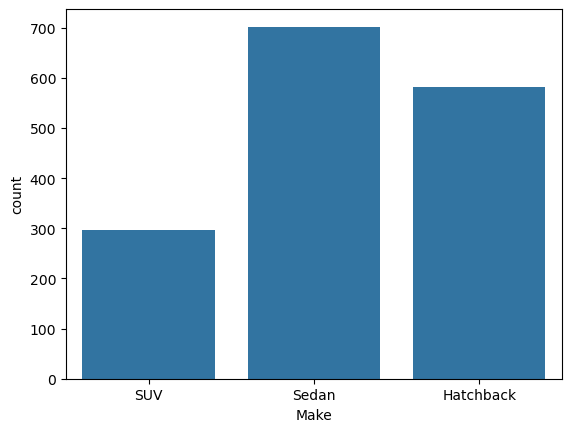

In [301]:
#35 Univariate categorical data Analysation - Make
sns.countplot(data=data, x='Make');

1.Percentage of sedan is more .hatch comes in second place and SUV in third place

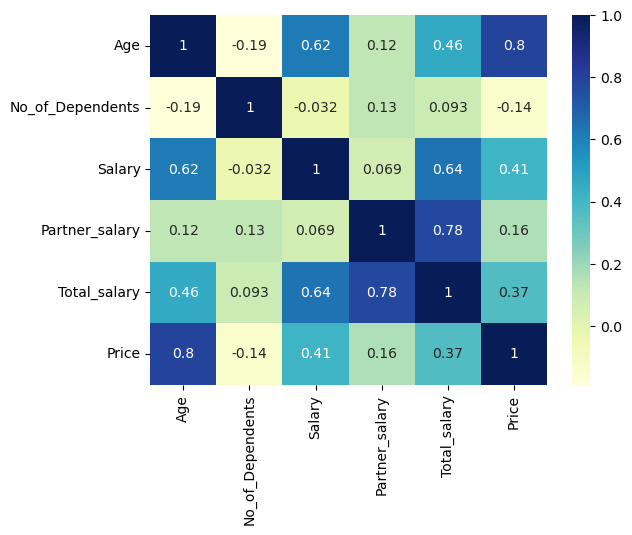

In [483]:
#36 Let us find correlation between all numerical columns
sns.heatmap(data=data[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(), annot=True,cmap='YlGnBu');

1 Age and price are highly correlated
2 No_of_Dependents column is negatively correlated with Age
3 Salary is positively correlated with Age,as age is increasing salary is also increasing
4 Partner salary and total salary columns are positively correlated.Partner salary is affecting total salary

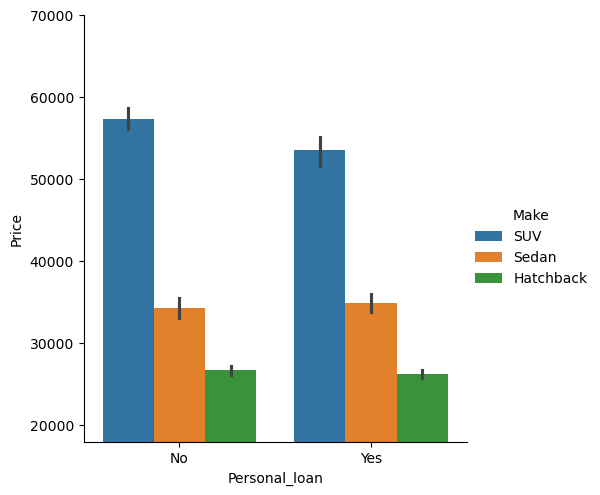

In [656]:
#37 Relationshipbetween categorical column(personal_loan) and numericalcolumn(Price)
sns.catplot(x='Personal_loan', y='Price', data=data, kind="bar",hue='Make')
plt.ylim(18000,70000)
plt.show()

Personal loan entity is not affecting sale that much .Without or with personal loan ,customer interest in buying car is almost similar

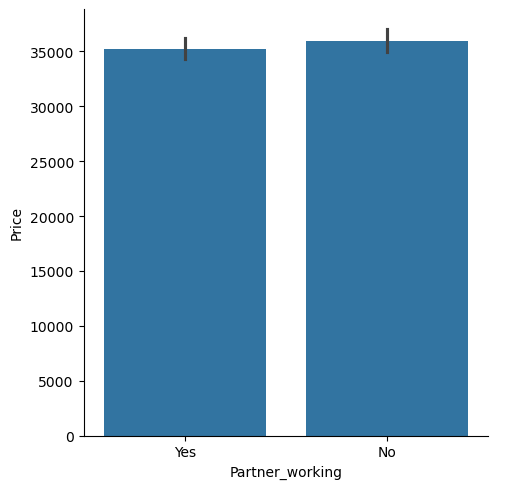

In [670]:
#38 Relationship between categorical column (Partner_working) and numerical column (Price)

sns.catplot(x='Partner_working', y='Price', data=data, kind="bar")
plt.show()

with or without working partner ,customer interest for buying car is similar.Trend for sale is not changing with respect to working partner

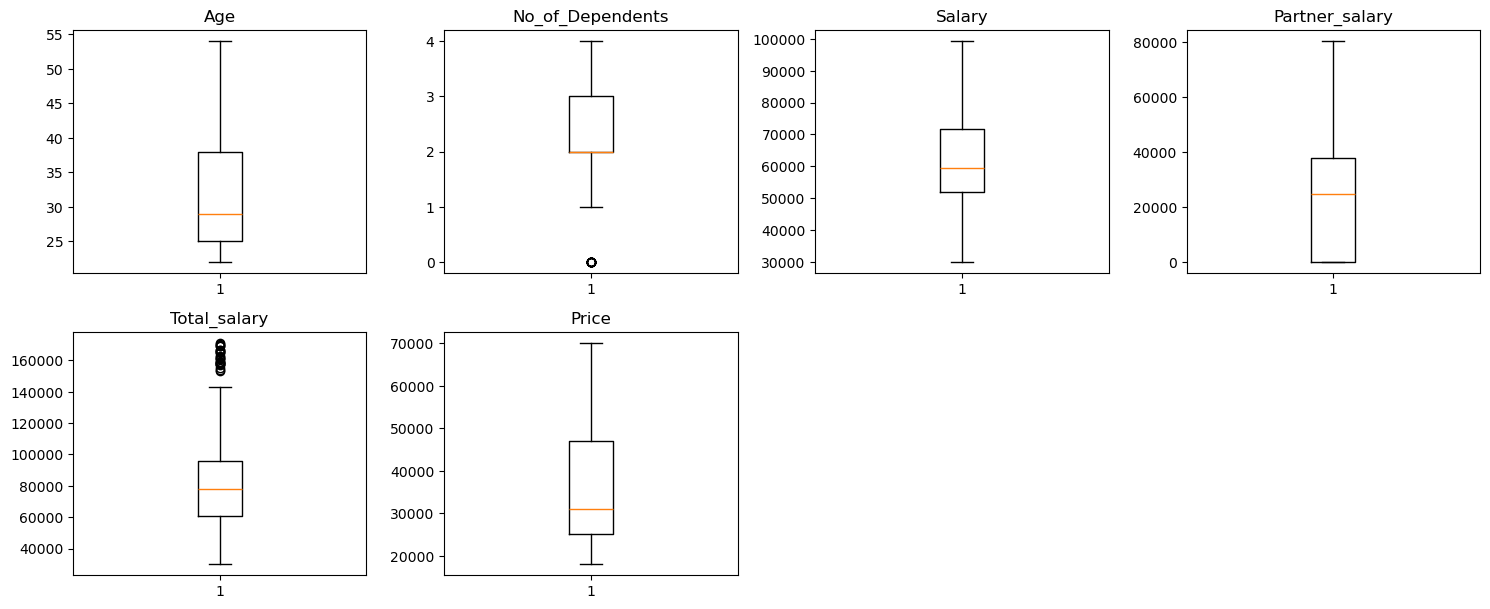

In [367]:
#39 Outliers detection

numeric_columns = ['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [372]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR


In [374]:
#40 Calculating percentage of outliers
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

Age                 0.000000
No_of_Dependents    1.265022
Salary              0.000000
Partner_salary      0.000000
Total_salary        1.707780
Price               0.000000
dtype: float64

There are genuine outliers present in both No_od_Dependents and Total_salary columns ,because person having 0 dependents and person having salary more 180000 USD both are possible cases and no need to consider these values as outliers

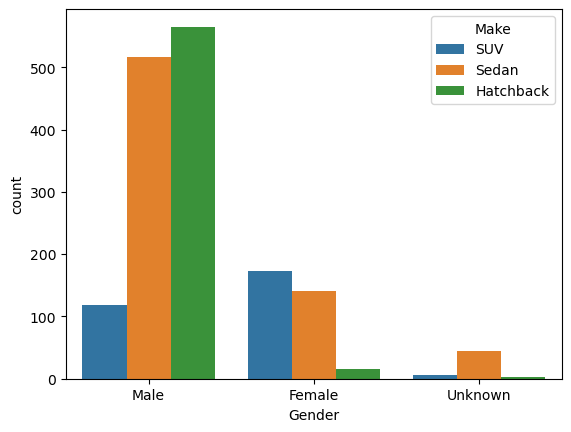

In [487]:
#40 .Key question
#40.1 1. Do men tend to prefer SUVs more compared to women?

sns.countplot(data=data, x='Gender',hue='Make');

No.Women tend to prefer SUVs more than men

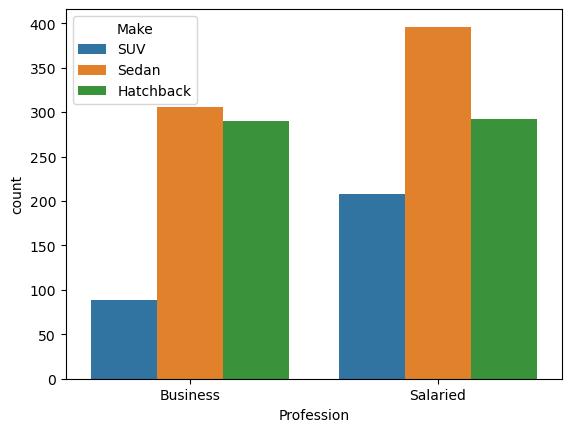

In [489]:
#41.2 What is the likelihood of a salaried person buying a Sedan?

sns.countplot(data=data, x='Profession',hue='Make');

Yes .Salaried persons prefers to buy sedan than any other model

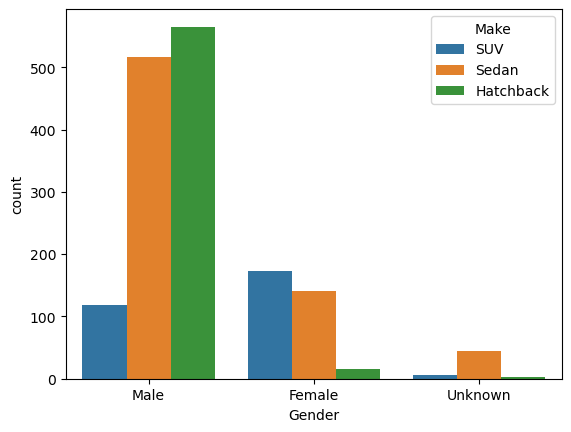

In [556]:
#41.3 What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

sns.countplot(data=data, x='Gender',hue='Make');



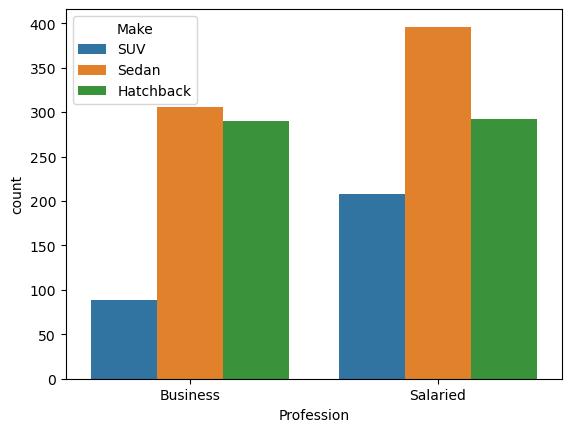

In [558]:
sns.countplot(data=data, x='Profession',hue='Make');

No evidence are there to prove that salaried men are the easier target for SUV.First graph shows more than 180 SUV cars are sold for women and in the second graph shows SUV sale for salaried person is 200 .If we analyze both data collectively we can say more salaried women prefers SUVs .Salaried men prefers to buy sedan models

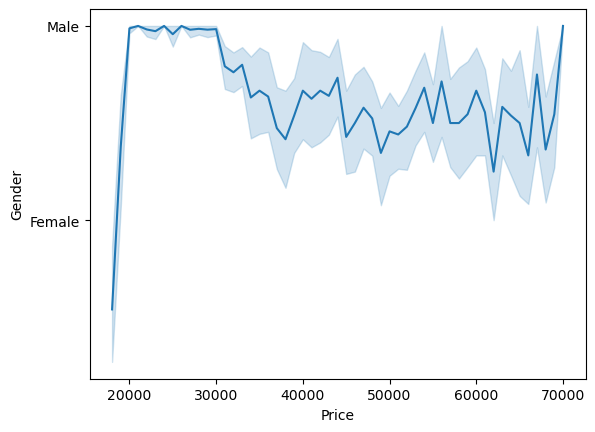

In [626]:
#41.4 How does the the amount spent on purchasing automobiles vary by gender?


sns.lineplot(data=data, x='Price',y='Gender');

plt.show()

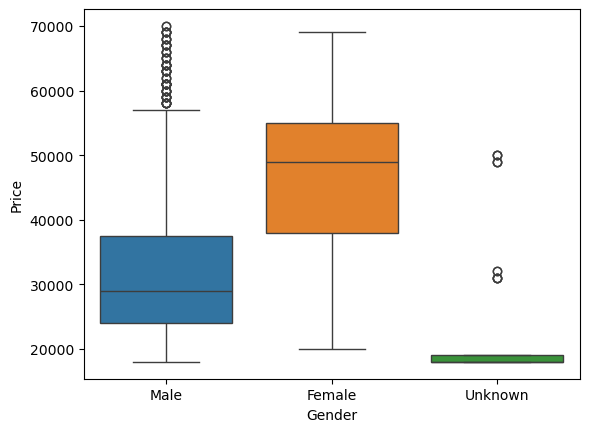

In [634]:
sns.boxplot(data=data, x='Gender',y='Price',hue='Gender');


Yes .There is  difference between men and women in spending amount for cars.More men prefers to spend amount on cars than women

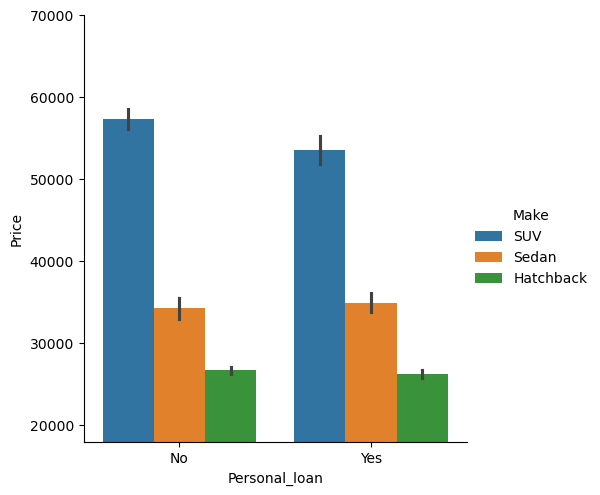

In [677]:
#41.5 How much money was spent on purchasing automobiles by individuals who took a personal loan?
sns.catplot(x='Personal_loan', y='Price', data=data, kind="bar",hue='Make')
plt.ylim(18000,70000)
plt.show()

Amount spent by customers who took personal loan is 20000USD to 55000USD

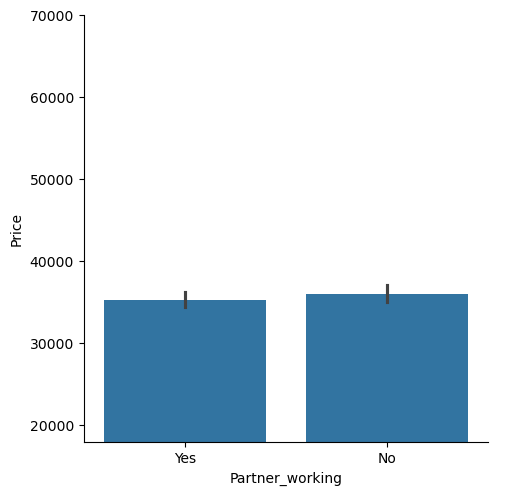

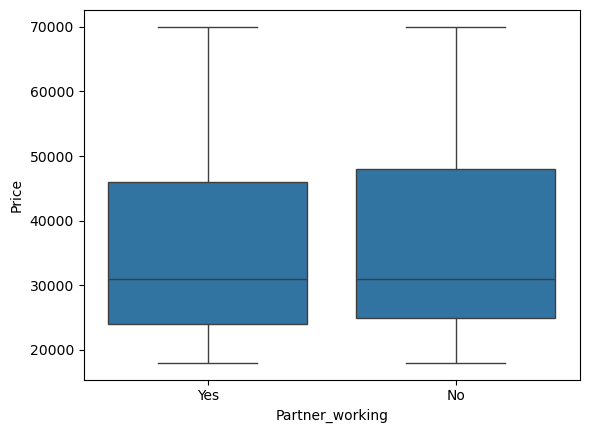

In [699]:
#41.6 How does having a working partner influence the purchase of higher-priced cars?
sns.catplot(x='Partner_working', y='Price', data=data, kind="bar")
plt.ylim(18000,70000)
plt.show()
sns.boxplot(data=data, x='Partner_working', y='Price') ;
plt.show()

The given pattern indicates that having working partner is not highly affective in influencing customer to buy high priced cars 

Insights :
1.There are 1581 rows and 14 columns in the data set

2.Age ,Salary,Partner_salary,Total_salary,Price,No_of_Dependents columns are are numerical columns,while the rest are categorical in nature

3.There are 6 numerical columns and 8 categoricl columns in the data set

4.Except 'Gender',"Partner_salary',there 1581 observations in each column.

5.'Gender' and 'Partner_salary" columns having 1528 and 1475 observations respectively ,which indicates missing data and imputed properly

6.Salary the vital thing to consider for the sales 

7.Partner salary is inversely affecting to sales i.e.as Partner salary increasing sale is decreasing

8.Total salary is inversely affecting to sales i.e.as Total salary increasing sale is decreasing

9.Customer is more interested in buying cars which are low in cost 

10.With the higher price, percentage of sale is reducing

11.Men prefers to buy a car more than women.

12.Women prefer to buy SUVs more than men

13.Men prefers more sedan and hatch back than women

14.Very less women prefers hatchbacks

15.Sale is more with the customers who are salaried

16.Salaried persons prefer sedan more than any other model

17.Hatchback is the second preferred model for both salaried and businesspeople

18.SUV is last preferred option by businesspeople

19.Married persons prefer to buy car more than a person who is single

20.Postgraduates prefers to buy car more than graduates

21.Personal loan entity is not affecting the sales. sale is almost same for the customer who takes personal loan and who does not take personal loan

22.Customers who are having house loans are not preferring buy car.

23.Customers who are not having house loans are preferring to buy a car.

24.Customer whose partners are working prefer to buy car more than the customers whose partners are not working

25.Make is the important aspect for the car sale.

26.More customers prefer to buy sedan make 

27.Hatchback is the second most preferred

28.SUV the last preferred make 





